# Coherence vs. bandwidth

Here we create a finite-bandwidth wave, with a gaussian envelope of frequencies contributing to it, and plot it
against a pure-sine wave as a phase reference.  The center frequency and width of the envelope are adjustable, so you can play with those and watch the coherence change.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [14, 10]

In [38]:
f0 = 5.0   # center frequency of envelope

sigf = .2 # width of gaussian frequency envelope

t0 = 50    # time goes from -t0 to +t0
nsamples = 100000  # how many time samples

# set up time vector
dt = 2*t0/nsamples
time = np.linspace(-t0,t0,nsamples)

# set up frequency vector
freq = np.fft.fftshift(np.fft.fftfreq(nsamples,dt))

# Create frequency domain FFT signal, random phase in gaussian envelope
fdist = np.abs(np.abs(freq)-f0)
phase = 2*np.pi*np.random.random(size=freq.size)
ft_vals = (nsamples/2)*np.exp(-fdist**2/(2*sigf**2))*np.exp(1j*phase)

# Transform that frequency-domain signal to the time domain
# Take the real part because that's the physical E-field
modsignal = np.real(np.fft.ifft(np.fft.fftshift(ft_vals)))
modsignal = modsignal/np.std(modsignal)  # normalize it so it has rms = 1.

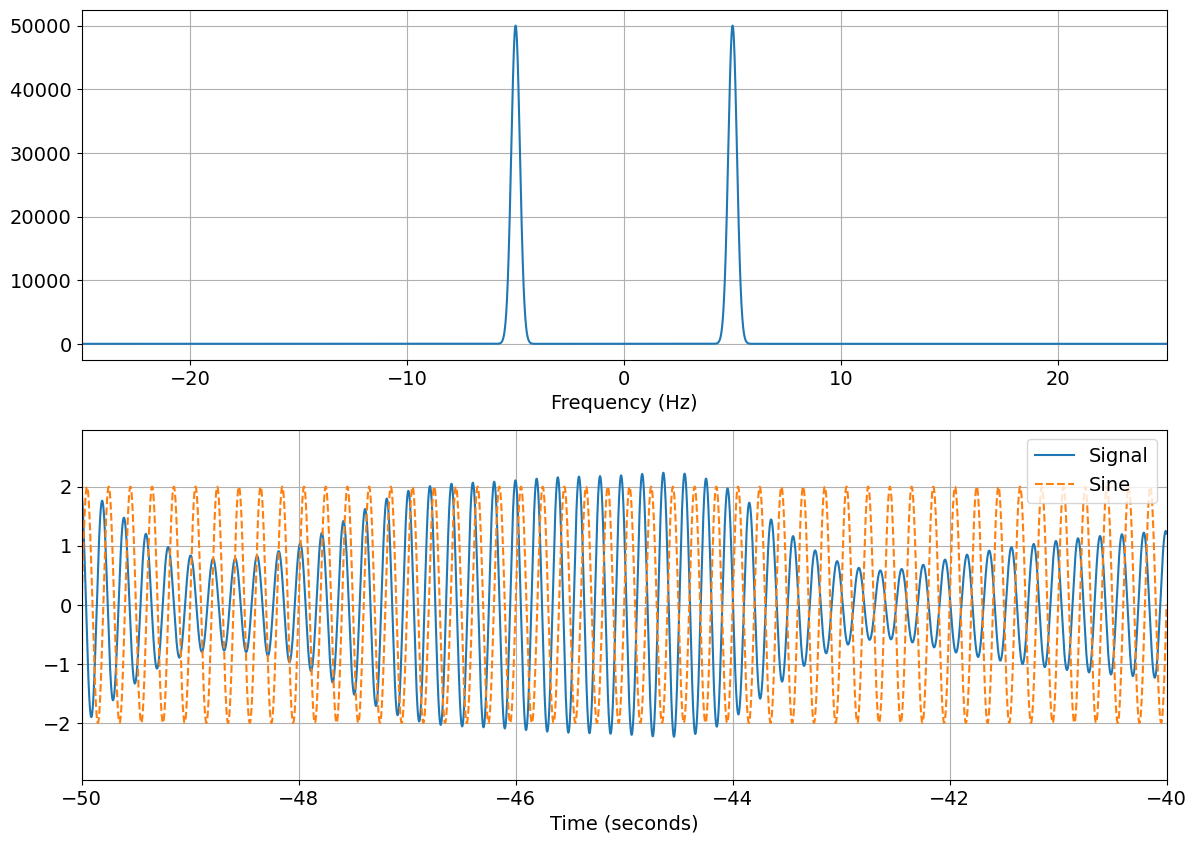

In [39]:
# Plot the frequency content
plt.clf()
plt.subplot(2,1,1)
plt.plot(freq,np.abs(ft_vals))
plt.xlim(-5*f0,5*f0)
plt.xlabel('Frequency (Hz)')
plt.grid()

# Plot a section of the time stream (from xstart to xend), with a cosine wave as a phase reference.
xstart = -t0
#xend = t0
#xstart = -50
xend=xstart+10

plt.subplot(2,1,2)
plt.plot(time,modsignal,label='Signal')
plt.plot(time,2*np.sin(2*np.pi*f0*time),'--',label='Sine')
plt.xlim(xstart,xend)
plt.xlabel('Time (seconds)')
plt.legend()
plt.grid()

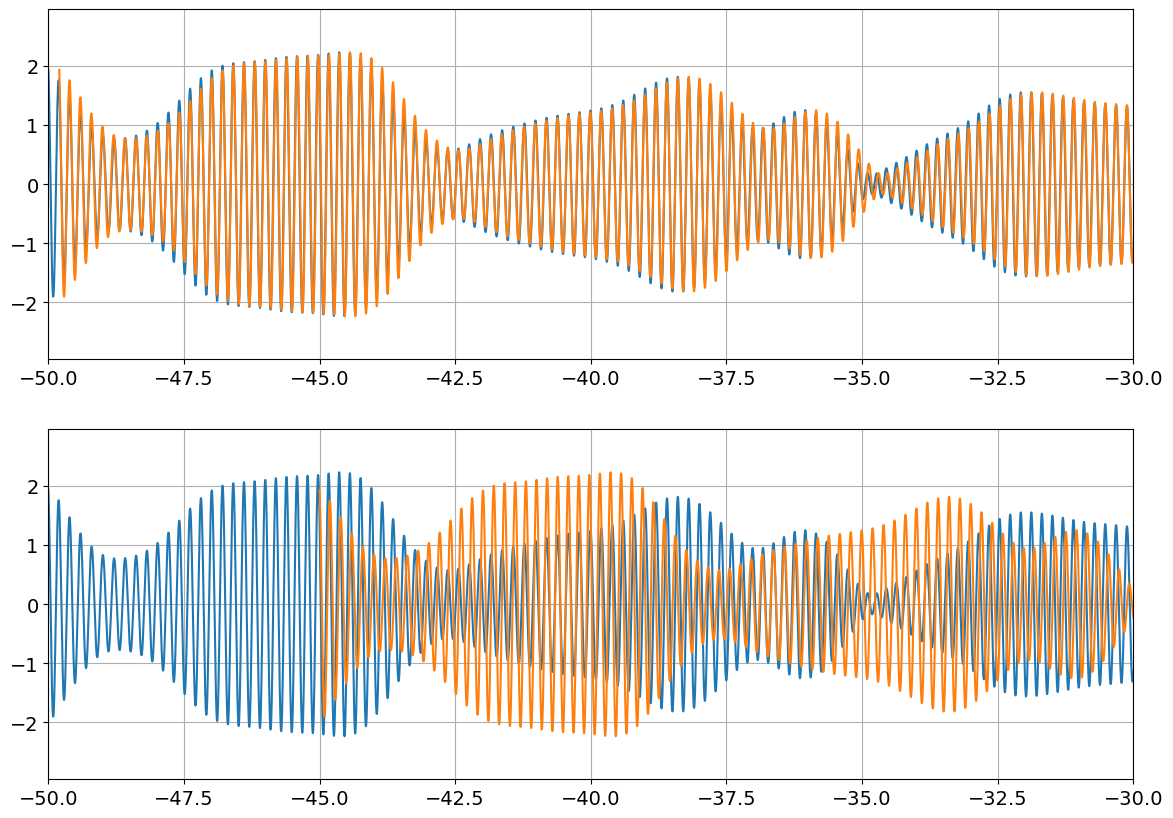

In [40]:
xstart = -50
xduration=20

# Plot two versions separated by 0.2 sec = 1 period
dt1 = 0.2
plt.clf()
plt.subplot(2,1,1)
plt.plot(time,modsignal)
plt.plot(time+dt1,modsignal)
plt.xlim(xstart,xstart+xduration)
plt.grid()

# plot two versions separated by dt2 = 5 sec = 25 periods
dt2 = 5.0
plt.subplot(2,1,2)
plt.plot(time,modsignal)
plt.plot(time+dt2, modsignal)
plt.xlim(xstart,xstart+xduration)
plt.grid()
